In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu06 = pd.read_csv('AHU_06.csv')
ahu06 = ahu06.ffill()

In [3]:
ahu06.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,31-12-2015,00:00:00,15.1,45.5,OFF,158.6,2.0,35.2,46.7,7.5,40.2,1.9,OFF,0.0
1,31-12-2015,00:00:00,15.1,45.9,OFF,158.2,2.0,35.3,46.0,5.6,40.4,1.9,OFF,0.0
2,31-12-2015,00:15:00,15.1,46.0,OFF,158.6,2.0,35.4,46.0,4.7,40.8,1.9,OFF,0.0
3,31-12-2015,00:30:00,15.1,46.2,OFF,158.6,2.0,35.3,46.0,4.1,40.6,1.9,OFF,0.0
4,31-12-2015,00:45:00,15.1,45.9,OFF,158.3,2.0,34.3,55.3,11.2,38.7,1.9,OFF,0.0


In [4]:
ahu06.rename(columns={'Column3':'Cooling coil valve %', 'Column4':'Cold Deck temperature', 'Column5':'exhaust fans ON?OFF'},inplace = 1)
ahu06.rename(columns={'Column6':'Hot Deck temperature', 'Column7':'Mixed air damper %', 'Column8':'Mixed air temperature '},inplace = 1)
ahu06.rename(columns={'Column1':'Date', 'Column2':'Time', 'Column9':'Pre-heat coil discharger temperature'},inplace = 1)
ahu06.rename(columns={'Column10':'Pre-heat coil Discharger valve', 'Column11':'Return air temperature', 'Column12':'Re-heat coil Discharger value'},inplace = 1)
ahu06.rename(columns={'Column13':'supply fan ON?OFF ', 'Column14':'Supply fan VFD speed %'},inplace = 1)
print list(ahu06.columns.values)
ahu06.head()

['Date', 'Time', 'Cooling coil valve %', 'Cold Deck temperature', 'exhaust fans ON?OFF', 'Hot Deck temperature', 'Mixed air damper %', 'Mixed air temperature ', 'Pre-heat coil discharger temperature', 'Pre-heat coil Discharger valve', 'Return air temperature', 'Re-heat coil Discharger value', 'supply fan ON?OFF ', 'Supply fan VFD speed %']


,Date,Time,Cooling coil valve %,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed air damper %,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil Discharger valve,Return air temperature,Re-heat coil Discharger value,supply fan ON?OFF,Supply fan VFD speed %
0,31-12-2015,00:00:00,15.1,45.5,OFF,158.6,2.0,35.2,46.7,7.5,40.2,1.9,OFF,0.0
1,31-12-2015,00:00:00,15.1,45.9,OFF,158.2,2.0,35.3,46.0,5.6,40.4,1.9,OFF,0.0
2,31-12-2015,00:15:00,15.1,46.0,OFF,158.6,2.0,35.4,46.0,4.7,40.8,1.9,OFF,0.0
3,31-12-2015,00:30:00,15.1,46.2,OFF,158.6,2.0,35.3,46.0,4.1,40.6,1.9,OFF,0.0
4,31-12-2015,00:45:00,15.1,45.9,OFF,158.3,2.0,34.3,55.3,11.2,38.7,1.9,OFF,0.0


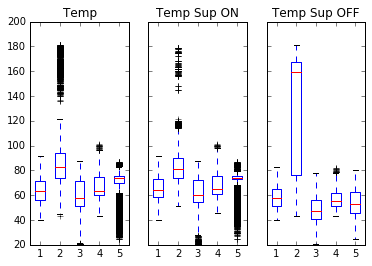

In [8]:
data_temp=[ahu06['Cold Deck temperature'],ahu06['Hot Deck temperature'],ahu06['Mixed air temperature '],
           ahu06['Pre-heat coil discharger temperature'],ahu06['Return air temperature']]
sup_on = ahu06[ahu06['supply fan ON?OFF '].str.contains('ON')]
sup_off = ahu06[ahu06['supply fan ON?OFF '].str.contains('OFF')]
data_temp_1 = [sup_on['Cold Deck temperature'],sup_on['Hot Deck temperature'],sup_on['Mixed air temperature '],
           sup_on['Pre-heat coil discharger temperature'],sup_on['Return air temperature']]
data_temp_2 = [sup_off['Cold Deck temperature'],sup_off['Hot Deck temperature'],sup_off['Mixed air temperature '],
           sup_off['Pre-heat coil discharger temperature'],sup_off['Return air temperature']]
#print sup_on.head()
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp Sup ON')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp Sup OFF')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_06']))

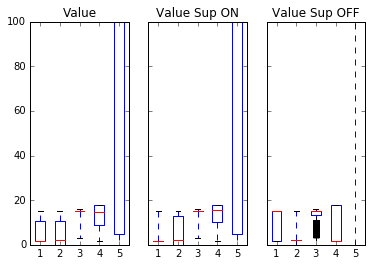

In [11]:
data_value=[ahu06['Cooling coil valve %'],ahu06['Mixed air damper %'],ahu06['Pre-heat coil Discharger valve'],
            ahu06['Re-heat coil Discharger value'],ahu06['Supply fan VFD speed %']]
data_value_1=[sup_on['Cooling coil valve %'],sup_on['Mixed air damper %'],sup_on['Pre-heat coil Discharger valve'],
           sup_on['Re-heat coil Discharger value'],sup_on['Supply fan VFD speed %']]
data_value_2=[sup_off['Cooling coil valve %'],sup_off['Mixed air damper %'],sup_off['Pre-heat coil Discharger valve'],
           sup_off['Re-heat coil Discharger value'],sup_off['Supply fan VFD speed %']]
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value Sup ON')
ax3.boxplot(data_value_2)
ax3.set_title('Value Sup OFF')
#plt.show()
plt.savefig(''.join(['values%','_ahu_06']))

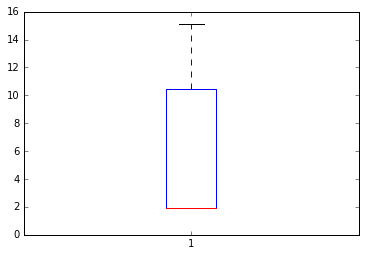

In [8]:
data_value_1 = [ahu06['Cooling coil valve %']]
plt.boxplot(data_value_1)
#plt.show()
plt.savefig(''.join(['values%','_ahu_06_CCV']))

[  2.    2.2   2.3   2.6   3.1   3.6   4.3   4.9   5.4   6.1   6.8   6.9
   6.7   2.1   2.7   3.9   6.2   7.    7.6   8.    8.2   8.3   8.4   8.5
   8.6   7.9   7.3   7.2   4.    2.4   2.8   3.2   3.8   4.4   5.3   8.1
   8.7   6.5   6.    5.6   5.2   3.4   2.5   3.7   4.5   6.6   7.7   9.
   9.2   9.3   9.4   9.5   9.6   9.7   9.1   9.8  10.   10.2  10.3  10.4
  10.5  10.6  10.9  11.1  11.   11.2  11.3  11.4  11.6  11.5  10.8  10.7
  10.1   9.9  11.7  11.8  11.9  12.   12.1  12.2  12.3  12.4  12.6  12.7
  12.8  12.9  13.   13.1  13.2  13.3  13.4   8.9   7.8   7.5   7.1   5.1
   0.    2.9   3.3   4.1   4.6   4.7   4.8   5.7   6.3   8.8   5.5   6.4
  13.5  13.7  13.9  14.   14.2  14.4  14.6  14.8  14.1   5.8   3.    5.9
   5.   13.6  14.9  15.   13.8  14.5  12.5   3.5   7.4  14.7  14.3   4.2]


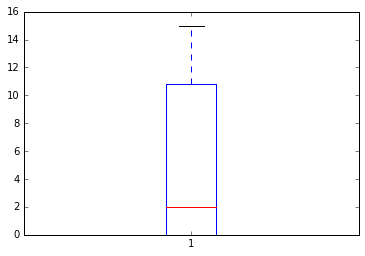

In [9]:
data_value_2 = [ahu06['Mixed air damper %']]
plt.boxplot(data_value_2)
#plt.show()
print ahu06['Mixed air damper %'].unique()
plt.savefig(''.join(['values%','_ahu_06_MAD']))

In [13]:
df1 = ahu06.copy()
print ahu06.columns.values
df1 = df1.drop(['Date','Time','exhaust fans ON?OFF','supply fan ON?OFF '],1)
print df1.columns.values

['Date' 'Time' 'Cooling coil valve %' 'Cold Deck temperature'
 'exhaust fans ON?OFF' 'Hot Deck temperature' 'Mixed air damper %'
 'Mixed air temperature ' 'Pre-heat coil discharger temperature'
 'Pre-heat coil Discharger valve' 'Return air temperature'
 'Re-heat coil Discharger value' 'supply fan ON?OFF '
 'Supply fan VFD speed %']
['Cooling coil valve %' 'Cold Deck temperature' 'Hot Deck temperature'
 'Mixed air damper %' 'Mixed air temperature '
 'Pre-heat coil discharger temperature' 'Pre-heat coil Discharger valve'
 'Return air temperature' 'Re-heat coil Discharger value'
 'Supply fan VFD speed %']


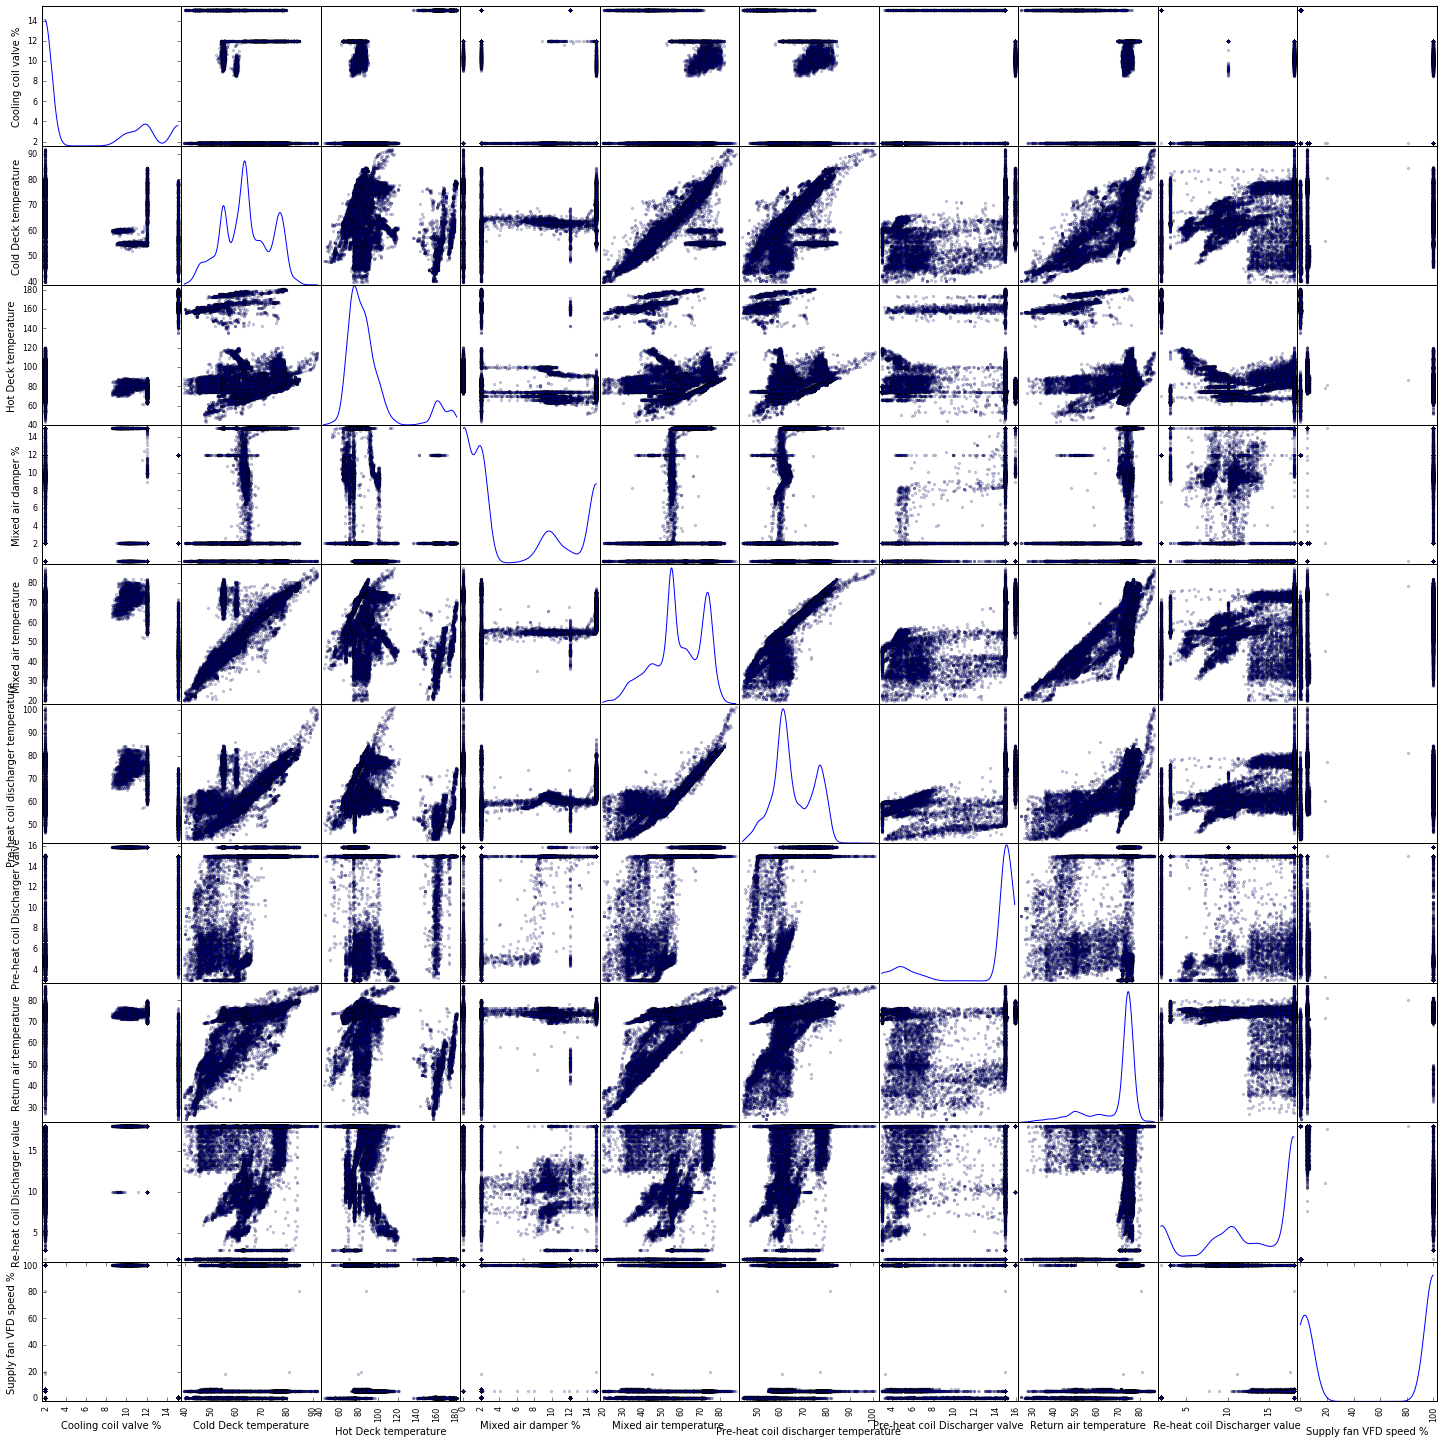

In [14]:
df = pd.scatter_matrix(df1, alpha=0.2,figsize=(25,25),diagonal='kde')
plt.savefig(''.join(['bivariate','_ahu_06']))